In [0]:
!pip3 install networkx==2.4

In [0]:
import csv
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
G_fb = nx.read_edgelist("email-Eu-core.txt", create_using = nx.Graph(), nodetype=int)
print(nx.info(G_fb))


Name: 
Type: Graph
Number of nodes: 1005
Number of edges: 16706
Average degree:  33.2458


(-1.0673014432191847,
 1.0723514467477797,
 -1.0940194398164749,
 0.974408236145973)

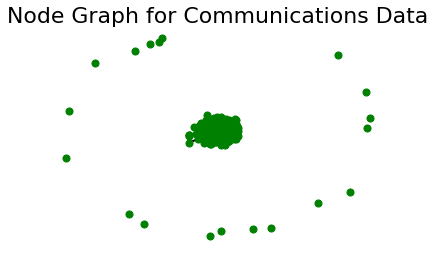

In [0]:
nx.draw_networkx_nodes(G_fb, pos, with_labels=True, node_size=50,font_size=7,node_color='green', label='Participants')
nx.draw_networkx_edges(G_fb, pos, with_labels=False, width=2.0,label='Number of Messages')
plt.title('Node Graph for Communications Data', fontsize=22, fontname='Arial')
plt.box(on=None)
plt.axis('off')

# Without self loops

In [0]:
for x in range(G_fb.number_of_nodes()):
    e=(x,x)
    if(G_fb.has_edge(*e)):
        G_fb.remove_edge(*e)

Name: 
Type: Graph
Number of nodes: 1005
Number of edges: 16064
Average degree:  31.9682


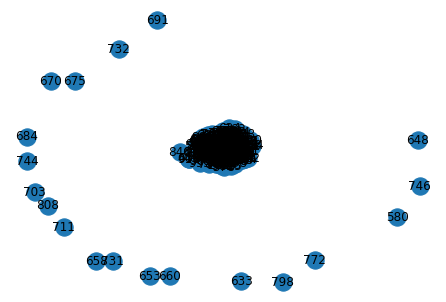

In [0]:
nx.draw(G_fb, with_labels = True)
print(nx.info(G_fb))

# girvan_newman

In [0]:
def edge_to_remove(graph):
  G_dict = nx.edge_betweenness_centrality(graph)
  edge = ()

  # extract the edge with highest edge betweenness centrality score
  for key, value in sorted(G_dict.items(), key=lambda item: item[1], reverse = True):
      edge = key
      break

  return edge

In [0]:
def girvan_newman(graph):
	# find number of connected components
	sg = nx.connected_components(graph)
	sg_count = nx.number_connected_components(graph)

	while(sg_count == 1):
		graph.remove_edge(edge_to_remove(graph)[0], edge_to_remove(graph)[1])
		sg = nx.connected_components(graph)
		sg_count = nx.number_connected_components(graph)

	return sg

In [21]:
# find communities in the graph

c = girvan_newman(G_fb.copy())

# find the nodes forming the communities
node_groups = []

for i in c:
  node_groups.append(list(i))
print(node_groups)
print(len(node_groups))

[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

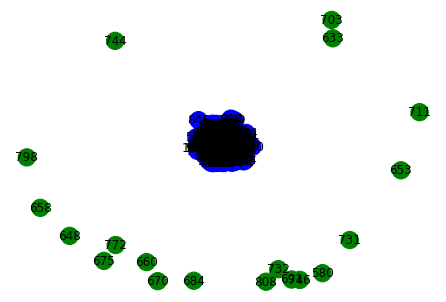

In [0]:
color_map = []
for node in G_fb:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  

nx.draw(G_fb, node_color=color_map, with_labels=True)
plt.show()